<a href="https://colab.research.google.com/github/maissadridi/stage-2024/blob/main/generativegraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/streaming_viewership_data.csv')


In [2]:
df.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


In [5]:
import re

def parse_user_message(message):
    pattern = re.compile(r"Create a graph showing the relationship between (\w+) and (\w+) where (\w+) is (\w+) than (\d+)")
    match = pattern.search(message)
    if match:
        return match.groups()
    else:
        raise ValueError("Message format not recognized")

message = "Create a graph showing the relationship between Genre and Country where Age is greater than 20"
columns_and_constraints = parse_user_message(message)


Step 3 : filter the data

In [6]:
column1, column2, column3, condition, value = columns_and_constraints
value = int(value)

if condition == 'greater':
    filtered_df = df[df[column3] > value]
elif condition == 'less':
    filtered_df = df[df[column3] < value]
# Add more conditions as needed
else:
    raise ValueError("Condition not recognized")


Step 4: Generate the Graph

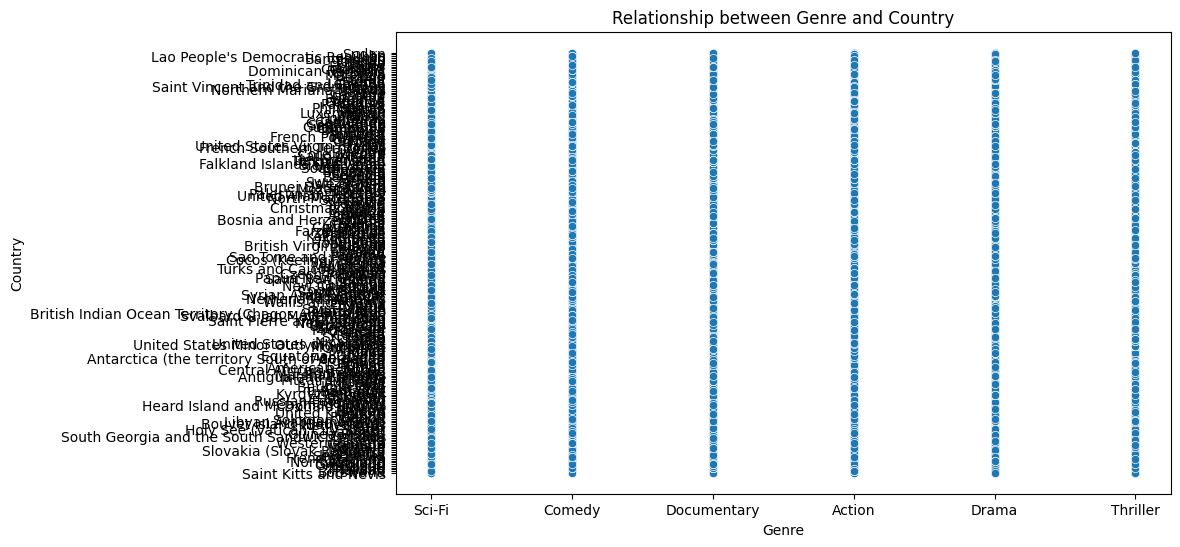

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_graph(df, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_column, y=y_column)
    plt.title(f'Relationship between {x_column} and {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

generate_graph(filtered_df, column1, column2)
